# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Regressions and Data vizulations
from sklearn import datasets
import seaborn as sns
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
name = []
lat = []
lon = []
temp = []
humd = []
cloud = []
wind = []
country = []
date = []


#Loop through the list of cities and perform a request for data on each

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response['main']["temp_max"])
        humd.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
    except:         
        pass
#print(f"{name}")
#     print(f"{lat}")
#     print(f"{lon}")
#     print(f"{temp}")
#     print(f"{humd}")
#     print(f"{cloud}")
#     print(f"{wind}")
#     print(f"{country}")
#     print(f"{date}")


In [ ]:
city_data = pd.DataFrame(
    {'City': name,
     'Lat': lat,
     'Lng': lon,
     "Max Temp":temp,
     "Humidity":humd,
     "Cloudiness":cloud,
     "Wind Speed":wind,
     "Country":country,
     "Date":date
    })
city_data
    
      
      
      
      
      
      
    

In [ ]:
city_data.describe()

In [ ]:
city_data.to_csv('WeatherPy.csv')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
file = pd.read_csv("WeatherPy.csv")
file.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Bluff,-46.6000,168.3333,57.79,61,100,16.51,NZ,1643863850
1,1,Punta Arenas,-53.1500,-70.9167,42.91,70,40,3.44,CL,1643863855
2,2,Jamestown,42.0970,-79.2353,38.52,71,100,4.61,US,1643863825
3,3,Mariehamn,60.0973,19.9348,19.26,93,100,1.14,AX,1643864261
4,4,Airai,-8.9266,125.4092,73.09,62,93,5.77,TL,1643863946


In [11]:
file.describe()

,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,280.000000,21.900962,12.113573,47.924777,74.390374,61.491979,7.938717,1.643864e+09
std,162.091024,33.060002,88.517922,31.146608,21.409674,40.202439,5.712751,2.284236e+02
min,0.000000,-54.800000,-179.166700,-34.440000,10.000000,0.000000,0.000000,1.643864e+09
25%,140.000000,-4.666700,-62.996700,26.920000,63.000000,18.000000,3.760000,1.643864e+09
50%,280.000000,28.306200,15.159400,56.730000,79.000000,75.000000,6.600000,1.643864e+09
75%,420.000000,50.050100,81.118500,73.330000,92.000000,100.000000,10.710000,1.643864e+09
max,560.000000,78.218600,178.416700,106.210000,100.000000,100.000000,35.810000,1.643864e+09


## Latitude vs. Temperature Plot

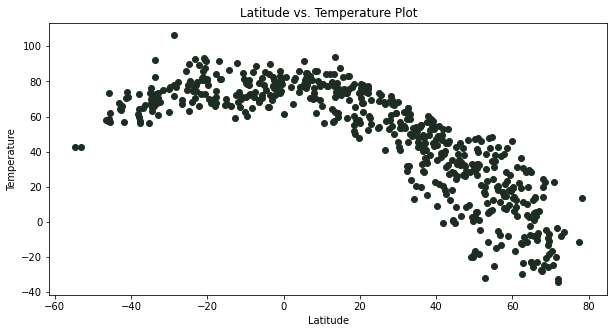

In [33]:
plt.figure(figsize=(10,5))


# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.scatter(file.Lat, file["Max Temp"], color="#1E2D24")


# Give our chart some labels and a tile
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

# Prints the scatter plot to the screen
# plt.show()
plt.savefig("lat_temp.png") 

## Latitude vs. Humidity Plot

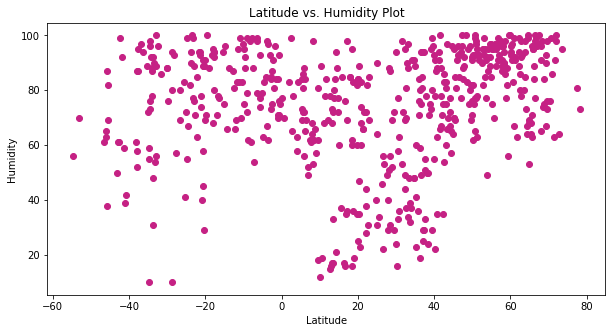

In [34]:
plt.figure(figsize=(10,5))


# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.scatter(file.Lat, file["Humidity"], color="#C52184")


# Give our chart some labels and a tile
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Prints the scatter plot to the screen
# plt.show()
plt.savefig("lat_humd.png") 

## Latitude vs. Cloudiness Plot

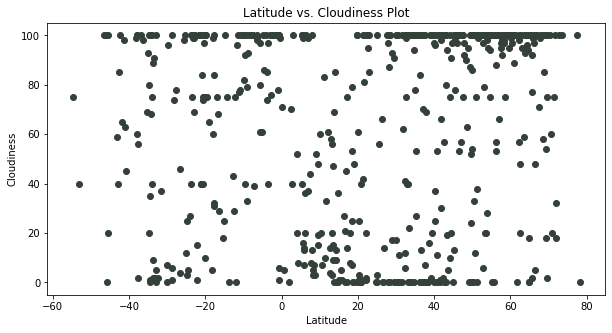

In [35]:
plt.figure(figsize=(10,5))


# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.scatter(file.Lat, file["Cloudiness"], color="#334139")


# Give our chart some labels and a tile
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Prints the scatter plot to the screen
# plt.show()
plt.savefig("lat_cloud.png") 

## Latitude vs. Wind Speed Plot

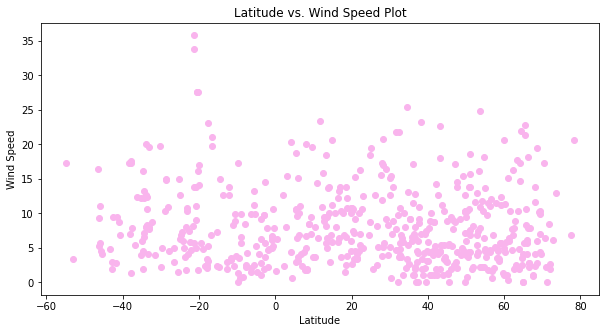

In [36]:
plt.figure(figsize=(10,5))


# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.scatter(file.Lat, file["Wind Speed"], color="#F9B4ED", alpha = 1.0)


# Give our chart some labels and a tile
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Prints the scatter plot to the screen
# plt.show()
plt.savefig("lat_wind.png") 

## Linear Regression

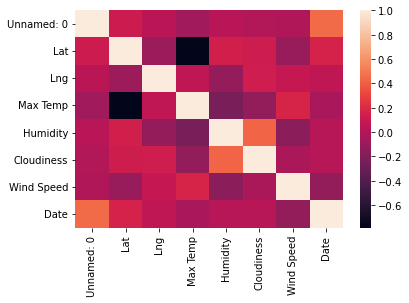

In [16]:
corrs = file.corr()
sns.heatmap(corrs)
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

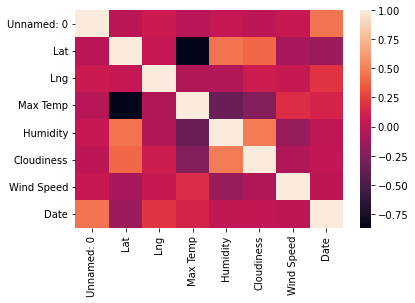

In [17]:
mask = file["Lat"] >= 0
df5 = file.loc[mask,:]

corrs = df5.corr()
sns.heatmap(corrs)
plt.show()

In [18]:
corrs

,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
Unnamed: 0,1.000000,-0.011527,0.061017,-0.024830,0.032636,-0.004415,0.043929,0.456359
Lat,-0.011527,1.000000,0.034387,-0.870166,0.445901,0.401730,-0.090475,-0.145355
Lng,0.061017,0.034387,1.000000,-0.046013,-0.050209,0.074946,0.048488,0.198850
Max Temp,-0.024830,-0.870166,-0.046013,1.000000,-0.362972,-0.245462,0.168737,0.122711
Humidity,0.032636,0.445901,-0.050209,-0.362972,1.000000,0.483026,-0.159118,0.008128
Cloudiness,-0.004415,0.401730,0.074946,-0.245462,0.483026,1.000000,-0.052629,0.017349
Wind Speed,0.043929,-0.090475,0.048488,0.168737,-0.159118,-0.052629,1.000000,0.001247
Date,0.456359,-0.145355,0.198850,0.122711,0.008128,0.017349,0.001247,1.000000


The r-value is: -0.8701660906729728


C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_15540/2947474114.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color = "#50C9CE")


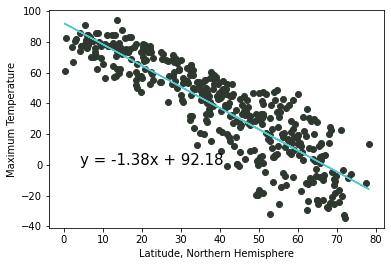

In [19]:
r1 = corrs.iloc[1]["Max Temp"]
print(f"The r-value is: {r1}")

x_values = df5['Lat']
y_values = df5['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,  color = "#2E382E")
plt.plot(x_values,regress_values,"r-", color = "#50C9CE")
plt.annotate(line_eq,(4,0),fontsize=15)
plt.xlabel('Latitude, Northern Hemisphere')
plt.ylabel('Maximum Temperature')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

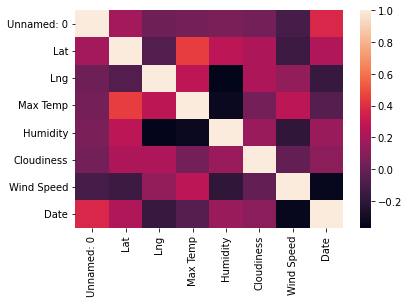

In [20]:
mask2 = file["Lat"] <= 0
df6 = file.loc[mask2,:]

corrs2 = df6.corr()
sns.heatmap(corrs2)
plt.show()

In [21]:
corrs2

,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
Unnamed: 0,1.000000,0.185609,0.015754,0.040872,0.062230,0.036639,-0.117898,0.373821
Lat,0.185609,1.000000,-0.069991,0.447171,0.266263,0.215203,-0.153853,0.224788
Lng,0.015754,-0.069991,1.000000,0.271608,-0.369323,0.215061,0.138814,-0.168830
Max Temp,0.040872,0.447171,0.271608,1.000000,-0.327733,0.041632,0.264698,-0.062803
Humidity,0.062230,0.266263,-0.369323,-0.327733,1.000000,0.156267,-0.194102,0.159244
Cloudiness,0.036639,0.215203,0.215061,0.041632,0.156267,1.000000,-0.016398,0.114910
Wind Speed,-0.117898,-0.153853,0.138814,0.264698,-0.194102,-0.016398,1.000000,-0.342622
Date,0.373821,0.224788,-0.168830,-0.062803,0.159244,0.114910,-0.342622,1.000000


The r-value is: 0.44717099163338364


C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_15540/1823672232.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color = "#A3A5C3")


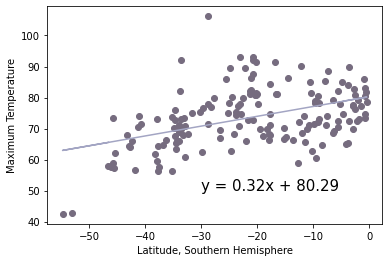

In [22]:
r2 = corrs2.iloc[1]["Max Temp"]
print(f"The r-value is: {r2}")

x_values = df6['Lat']
y_values = df6['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "#766C7F")
plt.plot(x_values,regress_values,"r-", color = "#A3A5C3")
plt.annotate(line_eq,(-30,50),fontsize=15)
plt.xlabel('Latitude, Southern Hemisphere')
plt.ylabel('Maximum Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.4459012582963557


C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_15540/4143374655.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color = "#92AA83")


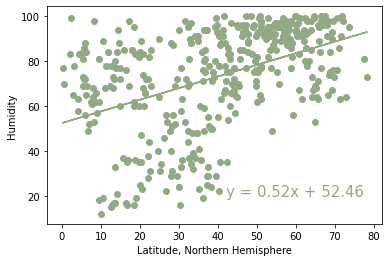

In [23]:
r3 = corrs.iloc[1]["Humidity"]
print(f"The r-value is: {r3}")

x_values = df5['Lat']
y_values = df5['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color ="#92AA83")
plt.plot(x_values,regress_values,"r-", color = "#92AA83")
plt.annotate(line_eq,(42,20),fontsize=15,color="#92AA83")
plt.xlabel('Latitude, Northern Hemisphere')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.26626275509408803


C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_15540/423414971.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color = "#986C6A")


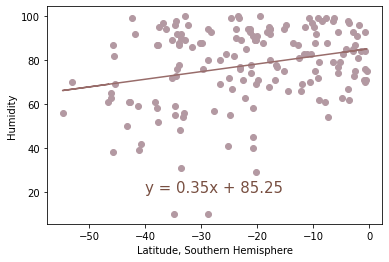

In [24]:
r4 = corrs2.iloc[1]["Humidity"]
print(f"The r-value is: {r4}")

x_values = df6['Lat']
y_values = df6['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "#B399A2")
plt.plot(x_values,regress_values,"r-", color = "#986C6A")
plt.annotate(line_eq,(-40,20),fontsize=15,color="#784F41")
plt.xlabel('Latitude, Southern Hemisphere')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.40173015613998125


C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_15540/920830793.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color = "#A7ABDD")


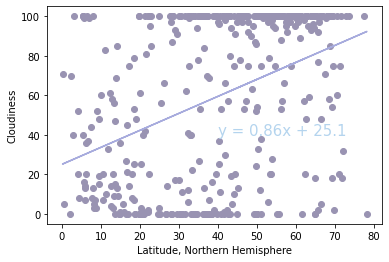

In [25]:
r5 = corrs.iloc[1]["Cloudiness"]
print(f"The r-value is: {r5}")

x_values = df5['Lat']
y_values = df5['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "#9993B2")
plt.plot(x_values,regress_values,"r-", color = "#A7ABDD")
plt.annotate(line_eq,(40,40),fontsize=15,color="#B4D4EE")
plt.xlabel('Latitude, Northern Hemisphere')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21520334707573285


C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_15540/1893478650.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-",  color ="#8F6593")


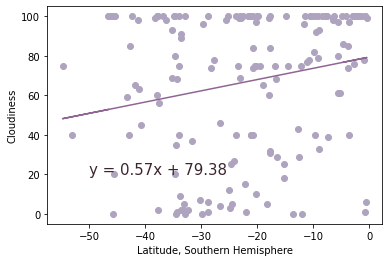

In [26]:
r6 = corrs2.iloc[1]["Cloudiness"]
print(f"The r-value is: {r6}")

x_values = df6['Lat']
y_values = df6['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color ="#AEA4BF")
plt.plot(x_values,regress_values,"r-",  color ="#8F6593")
plt.annotate(line_eq,(-50,20),fontsize=15,color="#3B252C")
plt.xlabel('Latitude, Southern Hemisphere')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.09047534108342906


C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_15540/1608492226.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color = "#69140E")


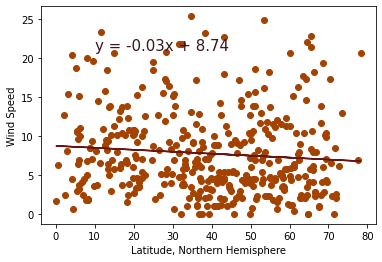

In [27]:
r7 = corrs.iloc[1]["Wind Speed"]
print(f"The r-value is: {r7}")

x_values = df5['Lat']
y_values = df5['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "#A44200")
plt.plot(x_values,regress_values,"r-", color = "#69140E")
plt.annotate(line_eq,(10,21),fontsize=15,color="#3C1518")
plt.xlabel('Latitude, Northern Hemisphere')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1538525726800278


C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_15540/1382519907.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color = "#27476E")


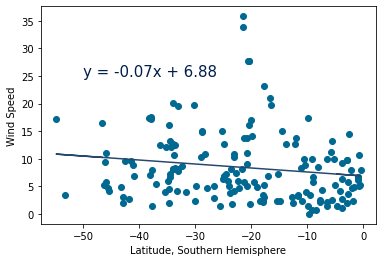

In [28]:
r8 = corrs2.iloc[1]["Wind Speed"]
print(f"The r-value is: {r8}")

x_values = df6['Lat']
y_values = df6['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = "#006992")
plt.plot(x_values,regress_values,"r-", color = "#27476E")
plt.annotate(line_eq,(-50,25),fontsize=15,color="#001D4A")
plt.xlabel('Latitude, Southern Hemisphere')
plt.ylabel('Wind Speed')
plt.show()